# 汉诺塔(Hanoi)

相传在古印度圣庙中，有一种被称为汉诺塔(Hanoi)的游戏。该游戏是在一块铜板装置上，有三根杆(编号A、B、C)，在A杆自下而上、由大到小按顺序放置64个金盘。  

游戏的目标：把A杆上的金盘全部移到C杆上，并仍保持原有顺序叠好。操作规则：每次只能移动一个盘子，并且在移动过程中**三根杆上都始终保持大盘在下，小盘在上**，操作过程中盘子可以置于A、B、C任一杆上。

是不是也想动手试试？运行下面的程序来体验一把吧！👇

In [ ]:
# 汉诺塔游戏实现。
import algviz

def movePlate(sour, dest):
    if len(sour) and (not len(dest) or sour[-1] < dest[-1]):
        dest.append(sour.pop())

def hanoiGame(n):
    viz = algviz.Visualizer(delay=1.0, wait=True)
    plates = [i for i in range(n, 0, -1)]
    A = viz.createVector(plates, name='A', show_index=False)
    B = viz.createVector(name='B', show_index=False)
    C = viz.createVector(name='C', show_index=False)
    count, flag = 0, True
    while len(A)+len(B) > 0:
        inp = viz.display()
        if inp == 'ac':
            movePlate(A, C)
        elif inp == 'ab':
            movePlate(A, B)
        elif inp == 'ba':
            movePlate(B, A)
        elif inp == 'bc':
            movePlate(B, C)
        elif inp == 'cb':
            movePlate(C, B)
        elif inp == 'ca':
            movePlate(C, A)
        elif inp == 'q':
            flag = False
            break
        count += 1
    viz.display()
    if flag:
        print('👍恭喜你完成了{}层的汉诺塔，共用了{}步。'.format(n, count))
    else:
        print('你已经走了{}步，再接再厉。'.format(n, count))
    
hanoiGame(3)

## 递归求解算法

*自己一个一个移动比较累，能不能交给程序自动完成呢？让我们来分析一下。*

汉诺塔的求解是一个递归的过程，我们可以倒着来分析（这也是递归的思想），把动作一步步拆解。  
具体步骤如下：

1. 将A杆上前n-1个盘子移动到B杆上（具体怎么移暂时不管）。
2. 将A杆上第n个盘子移动到C杆上，这个是基本操作，直接移动就行了。
3. 将B杆上的所有盘子移动到C杆上（这相当于一个子问题了，只不过A和B柱子的位置换了以下位置）。

按照上面的3个步骤反复执行，直到所有的盘子都移动到了C杆上。观察上述步骤可以发现，只有在步骤2中执行了具体的移动操作，而步骤1和步骤3都是递归的过程。如果我们有一个用于求解该问题的函数，那么该函数的接口应该像 `hanoi(left, mid, right, n)`，其中的 `left, mid, right` 分别代表三根柱子从左到右的排列位置，`n` 代表要移动柱子上的盘子数量。  

+ 执行步骤1时我们只需要以C为跳板，将A柱上的前n-1个盘子移动到B柱上，即调用 `hanoi(A, C, B, n-1)`即可。 
+ 执行步骤3时我们只需要以A为跳板，将B柱上所有的盘子移动到C柱上，即调用 `hanoi(B, A, C, n-1)` 即可。

那么算法什么时候停止移动盘子呢？这就需要在递归中加入**停止条件**了，其实很简单，我们只需要在操作前判断 `n` 中是否大于1即可。

## 复杂度分析

+ **时间复杂度：** 为了求解一个规模为n的问题，算法需要求解两次规模为n-1的子问题，并作一次移动操作，递推关系式为：
    $T(n) = \begin{cases} 2T(n-1) + 1 & n > 1 \\ 1 & n = 1 \end{cases}$，所以算法最终的时间复杂度为 $O(2^n)$，而 $2^{64}$ 可是一个天文数字，我们的算法怕是搞不定古印度圣庙里的那个问题了。
+ **空间复杂度：** 空间复杂度和递归的深度成正比，也即是盘子的个数，所以空间复杂度为 $O(n)$ 。

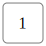

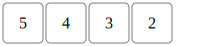

程序已完成5层汉诺塔，共用了31步。


In [3]:
# 汉诺塔递归求解算法实现。
import algviz

class Hanoi():
    def __init__(self, n):
        self.viz = algviz.Visualizer(1)
        self.count = 0
        plates = [i for i in range(n, 0, -1)]
        A = self.viz.createVector(plates, name='A', show_index=False)
        B = self.viz.createVector(name='B', show_index=False)
        C = self.viz.createVector(name='C', show_index=False)
        self.solve(A, B, C, n)
        print('程序已完成{}层汉诺塔，共用了{}步。'.format(n, self.count))
        
    def solve(self, A, B, C, n):
        if n > 0:
            self.solve(A, C, B, n-1)
            C.append(A.pop())
            self.count += 1
            self.viz.display()
            self.solve(B, A, C, n-1)
            
solver = Hanoi(5)

# 总结

当我们手工移动汉诺塔中的圆盘，或是观察程序移动圆盘的方式时，都是从下至上一步步的完成操作的。而神奇的是，我们的递归版本求解算法是从上至下设计和实现的，这就是递归算法的简洁之处，它从整体上去考虑问题的解决方法，从而跳出层层细节，威力无穷。

最后，解决同样规模的问题，你和我们的递归代码谁更快？如果你赢了，那就喝杯卡布奇诺☕庆祝一下吧！